Package Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler,Normalizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


ModuleNotFoundError: No module named 'distutils'

Data Import

In [3]:
df=pd.read_csv("/content/Crystal_structure.csv.crdownload")
df.drop(['In literature'],axis=1)

,Compound,A,B,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ,Lowest distortion
0,Ac2O3,Ac,Ac,0,0,1.12,1.12,1.12,1.10,1.10,0.00000,0.000000,-3.248000,0.707107,-,0.800000,cubic
1,AcAgO3,Ac,Ag,0,0,1.12,1.12,0.95,1.10,1.93,0.00000,2.488353,-2.565071,0.758259,-,0.678571,orthorhombic
2,AcAlO3,Ac,Al,0,0,1.12,1.12,0.54,1.10,1.61,0.00000,1.892894,-1.846714,0.918510,-,0.385714,cubic
3,AcAsO3,Ac,As,0,0,1.12,1.12,0.52,1.10,2.18,0.00000,1.932227,-1.577429,0.928078,-,0.371429,orthorhombic
4,AcAuO3,Ac,Au,0,0,1.12,1.12,0.93,1.10,2.54,0.00000,2.313698,-2.279786,0.764768,-,0.664286,orthorhombic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,ZrWO3,Zr,W,1,5,0.89,0.72,0.62,1.33,2.36,2.38342,1.745600,-1.572214,0.801621,5.228952455,0.442857,cubic
5325,ZrYO3,Zr,Y,-,-,0.89,0.72,0.90,1.33,1.22,2.38342,2.235124,-2.489571,0.704032,-,0.642857,cubic
5326,ZrYbO3,Zr,Yb,-,-,0.89,0.72,0.95,1.33,1.10,2.38342,2.223981,-2.626821,0.689053,-,0.678571,orthorhombic
5327,ZrZnO3,Zr,Zn,-,-,0.89,0.72,0.74,1.33,1.65,2.38342,2.096141,-2.035750,0.756670,-,0.528571,cubic


Data Cleaning

In [6]:
df1=df.drop(['In literature'],axis=1)
df2 =df1.drop(df1[df1["Lowest distortion"] == '-'].index)


for i in range(5329):
    if(df1.loc[i,'Lowest distortion']=='cubic'):
        df1.loc[i,'type']=0
    if(df1.loc[i,'Lowest distortion']=='orthorhombic'):
        df1.loc[i,'type']=1
    if(df1.loc[i,'Lowest distortion']=='rhombohedral'):
        df1.loc[i,'type']=2
    if(df1.loc[i,'Lowest distortion']=='tetragonal'):
        df1.loc[i,'type']=3


df2=df1.drop(['Compound','A','B','Lowest distortion'],axis=1)

data=df2[df2['v(A)']=='-']

df2 =df2.drop(df2[df2["v(A)"] == "-"].index)
df2['v(A)']=df2['v(A)'].astype(int)
df2['v(B)']=df2['v(B)'].astype(int)


df2["type"].fillna(-1, inplace = True)

df2 =df2.drop(df2[df2["type"] == -1].index)


<ipython-input-8-bc96a42a6b0a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df2.corr(method = 'pearson')


<Axes: >

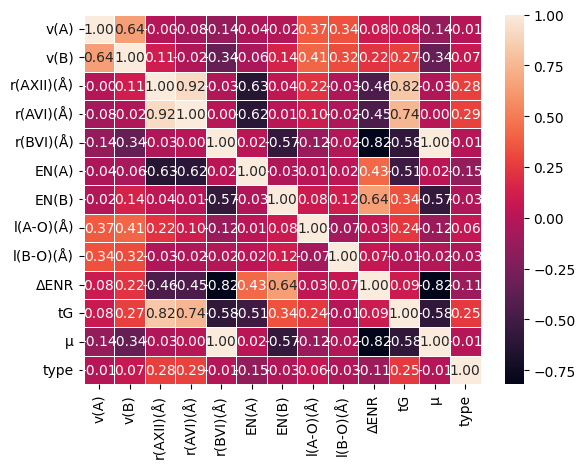

In [8]:
corr = df2.corr(method = 'pearson')

sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)

Selected top 5 features

In [9]:
X1=df2['tG'].to_numpy().reshape(-1,1)
X2=df2['ΔENR'].to_numpy().reshape(-1,1)
X3=df2['EN(A)'].to_numpy().reshape(-1,1)
X4=df2['r(AXII)(Å)'].to_numpy().reshape(-1,1)
X5=df2['r(AVI)(Å)'].to_numpy().reshape(-1,1)
y= df2["type"].to_numpy().reshape(-1,1)
x=np.hstack([X1,X2,X3,X4])

ss=StandardScaler()
scaler=Normalizer()
x_std=ss.fit_transform(x)
#spiliting
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2, random_state=42)
x1_train,x_val,y1_train,y_val=tts(x,y,test_size=0.1, random_state=42)


Model

In [10]:

tf.random.set_seed(1234)
model = Sequential(
    [
        Dense(25, activation = 'relu',   name = "L1"),
       Dense(25, activation = 'relu',   name = "L3"),
        Dense(4, activation = 'relu', name = "L2"),
        #Dense(1, activation = 'relu', name = "L4")

    ]
)


RMSprop optimizer

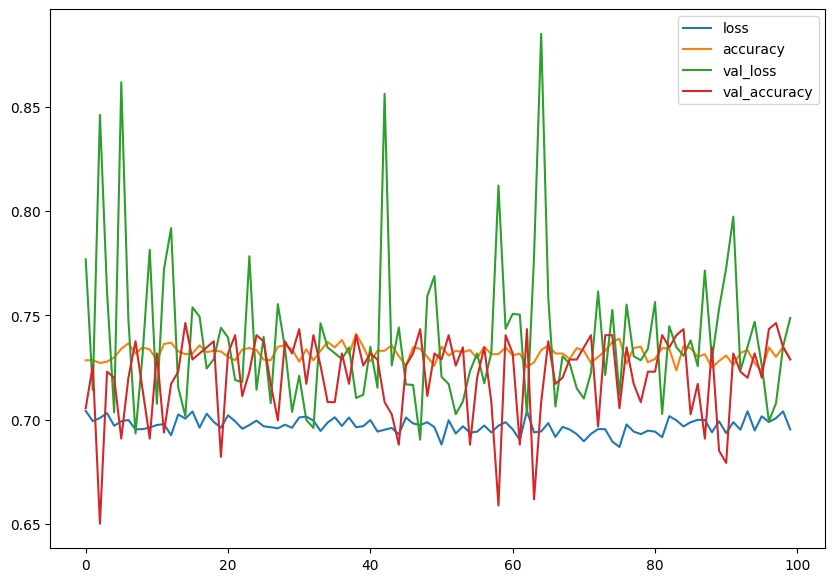

In [16]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.RMSprop(0.01),metrics=["accuracy"]
)
history_R = model.fit(x1_train, y1_train,
                      epochs=100,
                      batch_size=32,
                      validation_data=(x_val, y_val),
                      verbose=False)
pd.DataFrame(history_R.history).plot(figsize=(10, 7));

Stochastic Gradient Descent

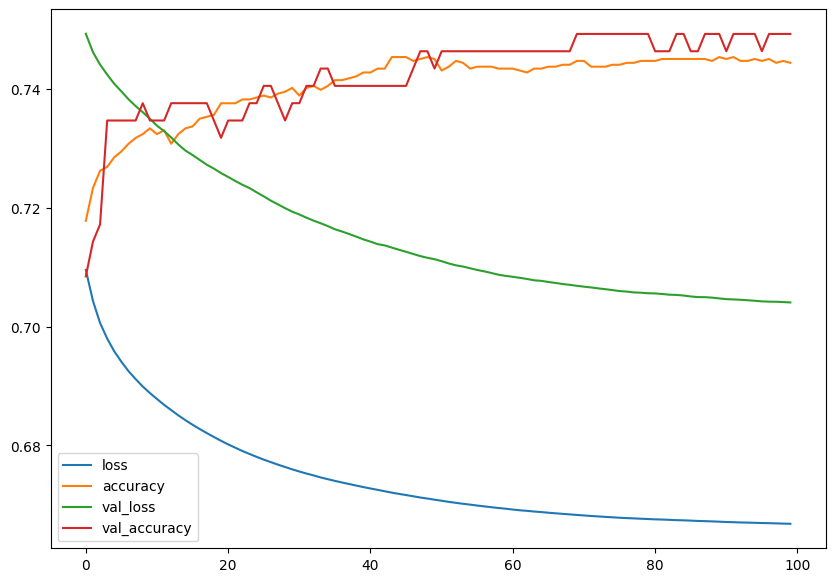

In [15]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.SGD(0.0001),metrics=["accuracy"]
)
history_S = model.fit(x1_train, y1_train,
                      epochs=100,
                      batch_size=32,
                      validation_data=(x_val, y_val),
                      verbose=False)
pd.DataFrame(history_S.history).plot(figsize=(10, 7));

AdaDelta

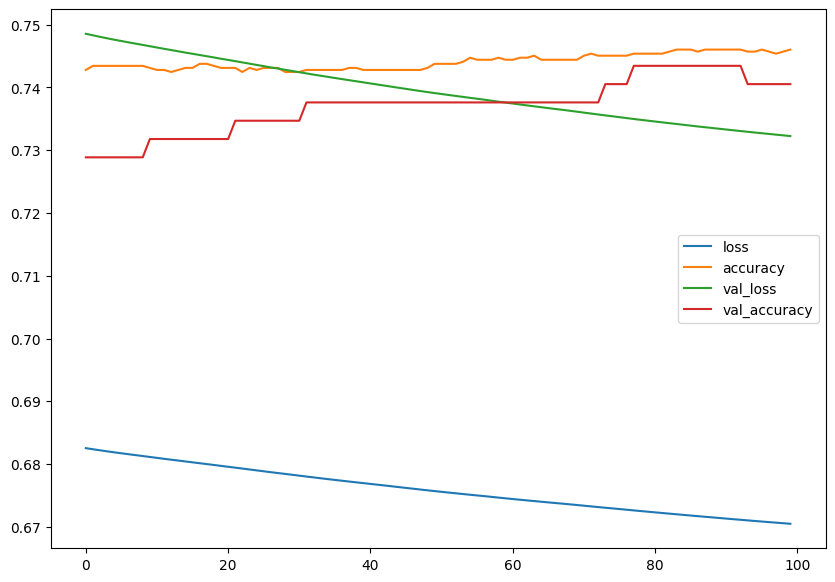

In [17]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adadelta(0.001),metrics=["accuracy"]
)
history_Ad = model.fit(x1_train, y1_train,
                      epochs=100,
                      batch_size=32,
                      validation_data=(x_val, y_val),
                      verbose=False)
pd.DataFrame(history_Ad.history).plot(figsize=(10, 7));

Adam

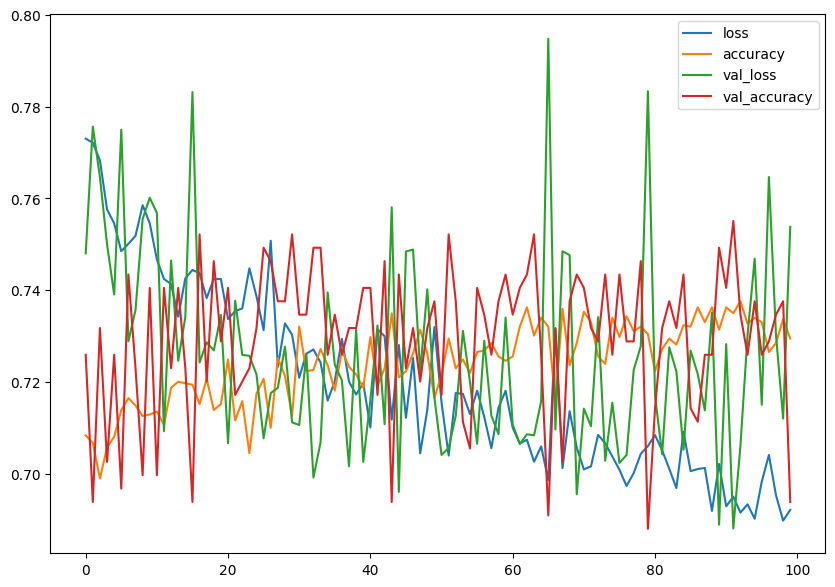

In [14]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),metrics=["accuracy"]
)
history_A = model.fit(x1_train, y1_train,
                      epochs=100,
                      batch_size=32,
                      validation_data=(x_val, y_val),
                      verbose=False)
pd.DataFrame(history_A.history).plot(figsize=(10, 7));

**CONCLUSION**

In this model different optimizers gave different results.

**RMSprop** had the best accuracy among all.

**Adam** took the least time to converge losses

**SGD** also performed quite well on both time and losses

**Adadelta** performed good on accuracy but was not good at reducing losses. This was the fastest optimizer among all.

Along with all this learning rate selection also determined the accuracy and affected it by a huge amount.
